<a href="https://colab.research.google.com/github/javiervz/romance_languages/blob/master/bibles_romance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# bibles

In [0]:
!pip install community

In [0]:
!pip install Cython

In [0]:
!pip install tabulate

In [0]:
!pip install networkit

    100% |████████████████████████████████| 1.8MB 2.4MB/s 
  Running setup.py bdist_wheel for networkit ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | 

In [0]:
import networkx as nx
import operator
import itertools
from nltk import sent_tokenize
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
import numpy as np
import xml.etree.ElementTree as ET
import pickle
import community
import networkit as nkit

In [0]:
def extract_bible_text(lang):
    root = ET.fromstring(open('/content/drive/My Drive/Colab Notebooks/bibles_romance/' + lang + '.xml').read())
    with open('/content/drive/My Drive/Colab Notebooks/bibles_romance/' + lang + '.txt', 'w', encoding='utf-8') as out:
        for n in root.iter('seg'):
            try:
                out.write(n.text.strip() + '\n')
            except AttributeError:
                pass
    file = open('/content/drive/My Drive/Colab Notebooks/bibles_romance/' +lang+'.txt', 'r') 
    bible=file.read().split('\n')
    #bible=[item for sublist in bible for item in sublist]
    return bible

In [0]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive/Colab Notebooks/bibles_romance"

74508712-Nuevo-Testamento-en-mapudungun.txt  French.xml		Portuguese.txt
bible_graphs.p				     graphs_measures.p	Portuguese.xml
bibles_romance.ipynb			     Italian.txt	Romanian.txt
core_clustering.pdf			     Italian.xml	Romanian.xml
core_components.pdf			     k_decomposition.p	Spanish.txt
degree_connectivity.pdf			     k_shell_zoom.pdf	Spanish.xml
degree_sequence.pdf			     Latin.txt		Untitled.ipynb
English.xml				     Latin.xml
French.txt				     PCA.pdf


## languages

In [0]:
language_names = ['Latin','Spanish','French','Italian','Portuguese','Romanian']
languages = {}
for language in language_names:
    languages[language]=extract_bible_text(language)#' '.join(extract_bible_text(language))

In [0]:
languages['Latin']

['in principio creavit Deus caelum et terram',
 'terra autem erat inanis et vacua et tenebrae super faciem abyssi et spiritus Dei ferebatur super aquas',
 'dixitque Deus fiat lux et facta est lux',
 'et vidit Deus lucem quod esset bona et divisit lucem ac tenebras',
 'appellavitque lucem diem et tenebras noctem factumque est vespere et mane dies unus',
 'dixit quoque Deus fiat firmamentum in medio aquarum et dividat aquas ab aquis',
 'et fecit Deus firmamentum divisitque aquas quae erant sub firmamento ab his quae erant super firmamentum et factum est ita',
 'vocavitque Deus firmamentum caelum et factum est vespere et mane dies secundus',
 'dixit vero Deus congregentur aquae quae sub caelo sunt in locum unum et appareat arida factumque est ita',
 'et vocavit Deus aridam terram congregationesque aquarum appellavit maria et vidit Deus quod esset bonum',
 'et ait germinet terra herbam virentem et facientem semen et lignum pomiferum faciens fructum iuxta genus suum cuius semen in semet ips

In [0]:
languages['Spanish']

['En el principio creó Dios los cielos y la tierra',
 'Y la tierra estaba sin orden y vacía. Había tinieblas sobre la faz del océano, y el Espíritu de Dios se movía sobre la faz de las aguas',
 'Entonces dijo Dios: "Sea la luz", y fue la luz',
 'Dios vio que la luz era buena, y separó Dios la luz de las tinieblas',
 'Dios llamó a la luz Día, y a las tinieblas llamó Noche. Y fue la tarde y fue la mañana del primer día',
 'Entonces dijo Dios: "Haya una bóveda en medio de las aguas, para que separe las aguas de las aguas.',
 'E hizo Dios la bóveda, y separó las aguas que están debajo de la bóveda, de las aguas que están sobre la bóveda. Y fue así',
 'Dios llamó a la bóveda Cielos. Y fue la tarde y fue la mañana del segundo día',
 'Entonces dijo Dios: "Reúnanse las aguas que están debajo del cielo en un solo lugar, de modo que aparezca la parte seca." Y fue así',
 'Llamó Dios a la parte seca Tierra, y a la reunión de las aguas llamó Mares; y vio Dios que esto era bueno',
 'Después dijo Dio

## tokenization

In [0]:
def clean(language):
    language=[[w.lower() for w in tokenizer.tokenize(sentence)] for sentence in language if len([w.lower() for w in tokenizer.tokenize(sentence)])>0]
    return language

In [0]:
for language in language_names:
    languages[language]=clean(languages[language])

In [0]:
words={}
for language in languages:
    words[language]=[len([item for sublist in languages[language] for item in sublist]),len(set([item for sublist in languages[language] for item in sublist]))]
    print(language,len(languages[language]),len([item for sublist in languages[language] for item in sublist]),len(set([item for sublist in languages[language] for item in sublist])))

Latin 31211 534301 42089
Spanish 31100 718543 26308
French 31102 782838 20532
Italian 31280 679747 29984
Portuguese 31092 707005 26111
Romanian 31102 720900 20345


In [0]:
colors={'Latin':['r','*'],'Spanish':['k','d'],'French':['m','s'],'Italian':['b','o'],'Portuguese':['orange','>'],'Romanian':['cyan','<']}
from matplotlib.text import TextPath
cmap = plt.get_cmap('RdBu')

fig, ax = plt.subplots(dpi=800)

for language in language_names:
    path = TextPath((-20,4), language,linewidth=1)

    # These dots are to display the weakness below, remove for the actual question
    plt.plot(words[language][0],words[language][1],marker=colors[language][1],color=colors[language][0],markersize=9,linewidth=0,markeredgewidth=1.,fillstyle='full',clip_on=True,label=language)
    #ax.plot(x[i],y[i],marker=path,markersize=75, color=colors[k_means.labels_[i]],markeredgewidth=0.5,clip_on=True)
    #ax.annotate(language, color='k', xy=(words[language][0]+0.05,words[language][1]+0.05), fontsize=15)

plt.grid(False)
plt.legend(loc='best')
#plt.xlim([-4.25,7.25])
#plt.ylim([-1.75,2.25])
plt.ylabel(r'number of different words',fontsize=12)
plt.xlabel(r'total number of words',fontsize=12)
plt.rcParams.update({'font.size': 15})
plt.savefig('words_languages.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

## graphs

In [0]:
def GoW(text_clean):
    G=nx.Graph()
    for sentence in text_clean:
        unique_words=list(set(sentence))
        pairs=list(itertools.combinations(unique_words,2)) ## sin repeticion!
        for pair in pairs:
            if G.has_edge(pair[0],pair[1])==False:
                G.add_edge(pair[0],pair[1])#,weight=1)
            #else:
            #    x=G[pair[0]][pair[1]]['weight']
            #    G[pair[0]][pair[1]]['weight']=x+1
        
    return G

In [0]:
graphs={}
for language in language_names:
    print(language)
    G=GoW(languages[language])
    graphs[language]=G

Latin
Spanish
French
Italian
Portuguese
Romanian


In [0]:
pickle.dump(graphs,open('bible_graphs.p','wb'))

In [0]:
graphs=pickle.load(open('bible_graphs.p','rb'))

In [0]:
density_clustering={}
shell_clustering={}
for language in language_names:
    G=graphs[language]
    G.remove_edges_from(nx.selfloop_edges(G))
    print(language)
    nodes=len(G.nodes)
    print('nodes: '+str(nodes))
    
    edges=len(G.edges)
    print('edges: '+str(edges))
    
    density=nx.density(G)
    print('density: '+str(density))
    
    average_degree=np.mean(list(dict(nx.degree(G)).values()))
    print('average_degree: '+str(average_degree))
    
    max_degree=np.max(list(dict(nx.degree(G)).values()))
    print('max_degree: '+str(max_degree))
    
    assortativity=nx.degree_pearson_correlation_coefficient(G)
    print('assortativity: '+str(assortativity))
    
    nkit_G=nkit.nxadapter.nx2nk(G)
    
    clustering=np.mean(nkit.centrality.LocalClusteringCoefficient(nkit_G).run().scores())
    print('average_clustering: '+str(clustering))
    
    #v = 0
    #bfs = nkit.distance.BFS(nkit_G, v)
    #bfs.run()
    #bfsdist = bfs.getDistances()
    #shortest=np.mean(bfsdist)

    #print('average_shortest_path: '+str(shortest))
    cc = nkit.components.ConnectedComponents(nkit_G)
    cc.run()
    number_cc=cc.numberOfComponents()
    print('number_connected_components: '+str(number_cc))
    
    core_number=np.mean(nkit.centrality.CoreDecomposition(nkit_G).run().scores())
    print('average_core_number: '+str(core_number))
    
    max_core_number=np.max(nkit.centrality.CoreDecomposition(nkit_G).run().scores())
    print('max_core_number: '+str(max_core_number))
    
    shell_clustering[language]=[nkit.centrality.CoreDecomposition(nkit_G).run().scores(),nkit.centrality.LocalClusteringCoefficient(nkit_G).run().scores()]
    
    density_clustering[language]=[max_core_number,nodes,edges,density,clustering,number_cc,max_degree,average_degree,core_number,assortativity]

Latin
nodes: 42089
edges: 1957307
density: 0.0022098461994545467
average_degree: 93.00800684264297
max_degree: 37058
assortativity: -0.15849830976724824
average_clustering: 0.7943336721566275
number_connected_components: 1
average_core_number: 47.922901470693056
max_core_number: 292.0
Spanish
nodes: 26308
edges: 1654981
density: 0.004782597691719044
average_degree: 125.81579747605291
max_degree: 22340
assortativity: -0.24655948331088107
average_clustering: 0.8320125114007064
number_connected_components: 5
average_core_number: 65.21031625361107
max_core_number: 320.0
French
nodes: 20532
edges: 1658153
density: 0.007867074050508769
average_degree: 161.51889733099551
max_degree: 17901
assortativity: -0.29782280449990955
average_clustering: 0.8236730654215103
number_connected_components: 6
average_core_number: 83.9473017728424
max_core_number: 339.0
Italian
nodes: 29984
edges: 1916991
density: 0.004264669847954752
average_degree: 127.86759605122732
max_degree: 24123
assortativity: -0.26220

In [0]:
pickle.dump(density_clustering,open('graphs_measures.p','wb'))

In [0]:
density_clustering=pickle.load(open('graphs_measures.p','rb'))

In [0]:
density_clustering

{'French': [339.0,
  20532,
  1658153,
  0.007867074050508769,
  0.8236730654215103,
  6,
  17901,
  161.51889733099551,
  83.9473017728424,
  -0.29782280449990955],
 'Italian': [348.0,
  29984,
  1916991,
  0.004264669847954752,
  0.8372397461615774,
  7,
  24123,
  127.86759605122732,
  66.31583511205976,
  -0.26220010778391933],
 'Latin': [292.0,
  42089,
  1957307,
  0.0022098461994545467,
  0.7943336721566275,
  1,
  37058,
  93.00800684264297,
  47.922901470693056,
  -0.15849830976724824],
 'Portuguese': [340.0,
  26111,
  1715795,
  0.005033441401461084,
  0.8322994712177679,
  4,
  22668,
  131.4231549921489,
  68.2726054153422,
  -0.25173997160984285],
 'Romanian': [378.0,
  20345,
  1722048,
  0.008321108924531966,
  0.8031481229133491,
  6,
  18189,
  169.2846399606783,
  88.69810764315557,
  -0.2708958839927998],
 'Spanish': [320.0,
  26308,
  1654981,
  0.004782597691719044,
  0.8320125114007064,
  5,
  22340,
  125.81579747605291,
  65.21031625361107,
  -0.246559483310881

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X=[]
for language in language_names:
    X+=[density_clustering[language]]
X = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X = pca.fit(X).transform(X)

In [0]:
from sklearn.metrics.pairwise import cosine_similarity
import operator
distances={language_names[i]:cosine_similarity(X[0].reshape(1, -1),X[i].reshape(1, -1)) for i in range(len(language_names))}

In [0]:
sorted(distances.items(), key=operator.itemgetter(1),reverse=True)

[('Latin', array([[1.]])),
 ('Italian', array([[-0.11247722]])),
 ('Spanish', array([[-0.15161996]])),
 ('Portuguese', array([[-0.40712602]])),
 ('Romanian', array([[-0.74081825]])),
 ('French', array([[-0.9658908]]))]

In [0]:
X

array([[ 5.5683863 ,  1.03911189],
       [ 0.03133933, -0.9705143 ],
       [-2.67086825,  0.20726655],
       [ 0.10425762, -1.45013777],
       [-0.14466207, -0.60469532],
       [-2.88845293,  1.77896895]])

In [0]:
x=list(zip(*list(X)))[0]
y=list(zip(*list(X)))[1]

In [0]:
from sklearn import cluster
k_means = cluster.KMeans(n_clusters=2, n_init=1)
k_means.fit(X) 
k_means.labels_

array([1, 0, 0, 0, 0, 0], dtype=int32)

In [0]:
k_means.cluster_centers_

array([[-1.11367726, -0.20782238],
       [ 5.5683863 ,  1.03911189]])

In [0]:
center_x=list(zip(*k_means.cluster_centers_))[0]
center_y=list(zip(*k_means.cluster_centers_))[1]

In [0]:
from matplotlib.text import TextPath
colors=['r','b']
cmap = plt.get_cmap('RdBu')

fig, ax = plt.subplots(dpi=800)

for i in range(len(x)):
    path = TextPath((-20,4), language_names[i],linewidth=1)

    # These dots are to display the weakness below, remove for the actual question
    plt.plot(x[i],y[i],'o',color=colors[k_means.labels_[i]],markersize=7,markeredgewidth=1.,fillstyle='full',clip_on=True)
    #ax.plot(x[i],y[i],marker=path,markersize=75, color=colors[k_means.labels_[i]],markeredgewidth=0.5,clip_on=True)
    ax.annotate(language_names[i], color=colors[k_means.labels_[i]], xy=(x[i]+0.05,y[i]+0.05), fontsize=15)
for i in range(len(colors)):
    ax.plot(center_x[i],center_y[i],'x',color=colors[i],markersize=9,markeredgewidth=1.5,markeredgecolor='k',fillstyle='full',clip_on=True)

plt.grid(False)
plt.xlim([-4.25,7.25])
plt.ylim([-1.75,2.25])
plt.ylabel(r'principal component 2',fontsize=12)
plt.xlabel(r'principal component 1',fontsize=12)
plt.rcParams.update({'font.size': 15})
plt.savefig('PCA.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [0]:
degree_sequence={}
for language in language_names:
    G=graphs[language]
    nkit_G=nkit.nxadapter.nx2nk(G)
    dd=sorted(nkit.centrality.DegreeCentrality(nkit_G).run().scores(), reverse=True)
    degree_sequence[language]=dd

In [0]:
degree_connectivity={}
for language in language_names:
    print(language)
    G=graphs[language]
    degree_connectivity[language]=nx.average_degree_connectivity(G)


Latin
Spanish
French
Italian
Portuguese
Romanian


In [0]:
colors={'Latin':['r','*'],'Spanish':['k','d'],'French':['m','s'],'Italian':['b','o'],'Portuguese':['orange','>'],'Romanian':['cyan','<']}

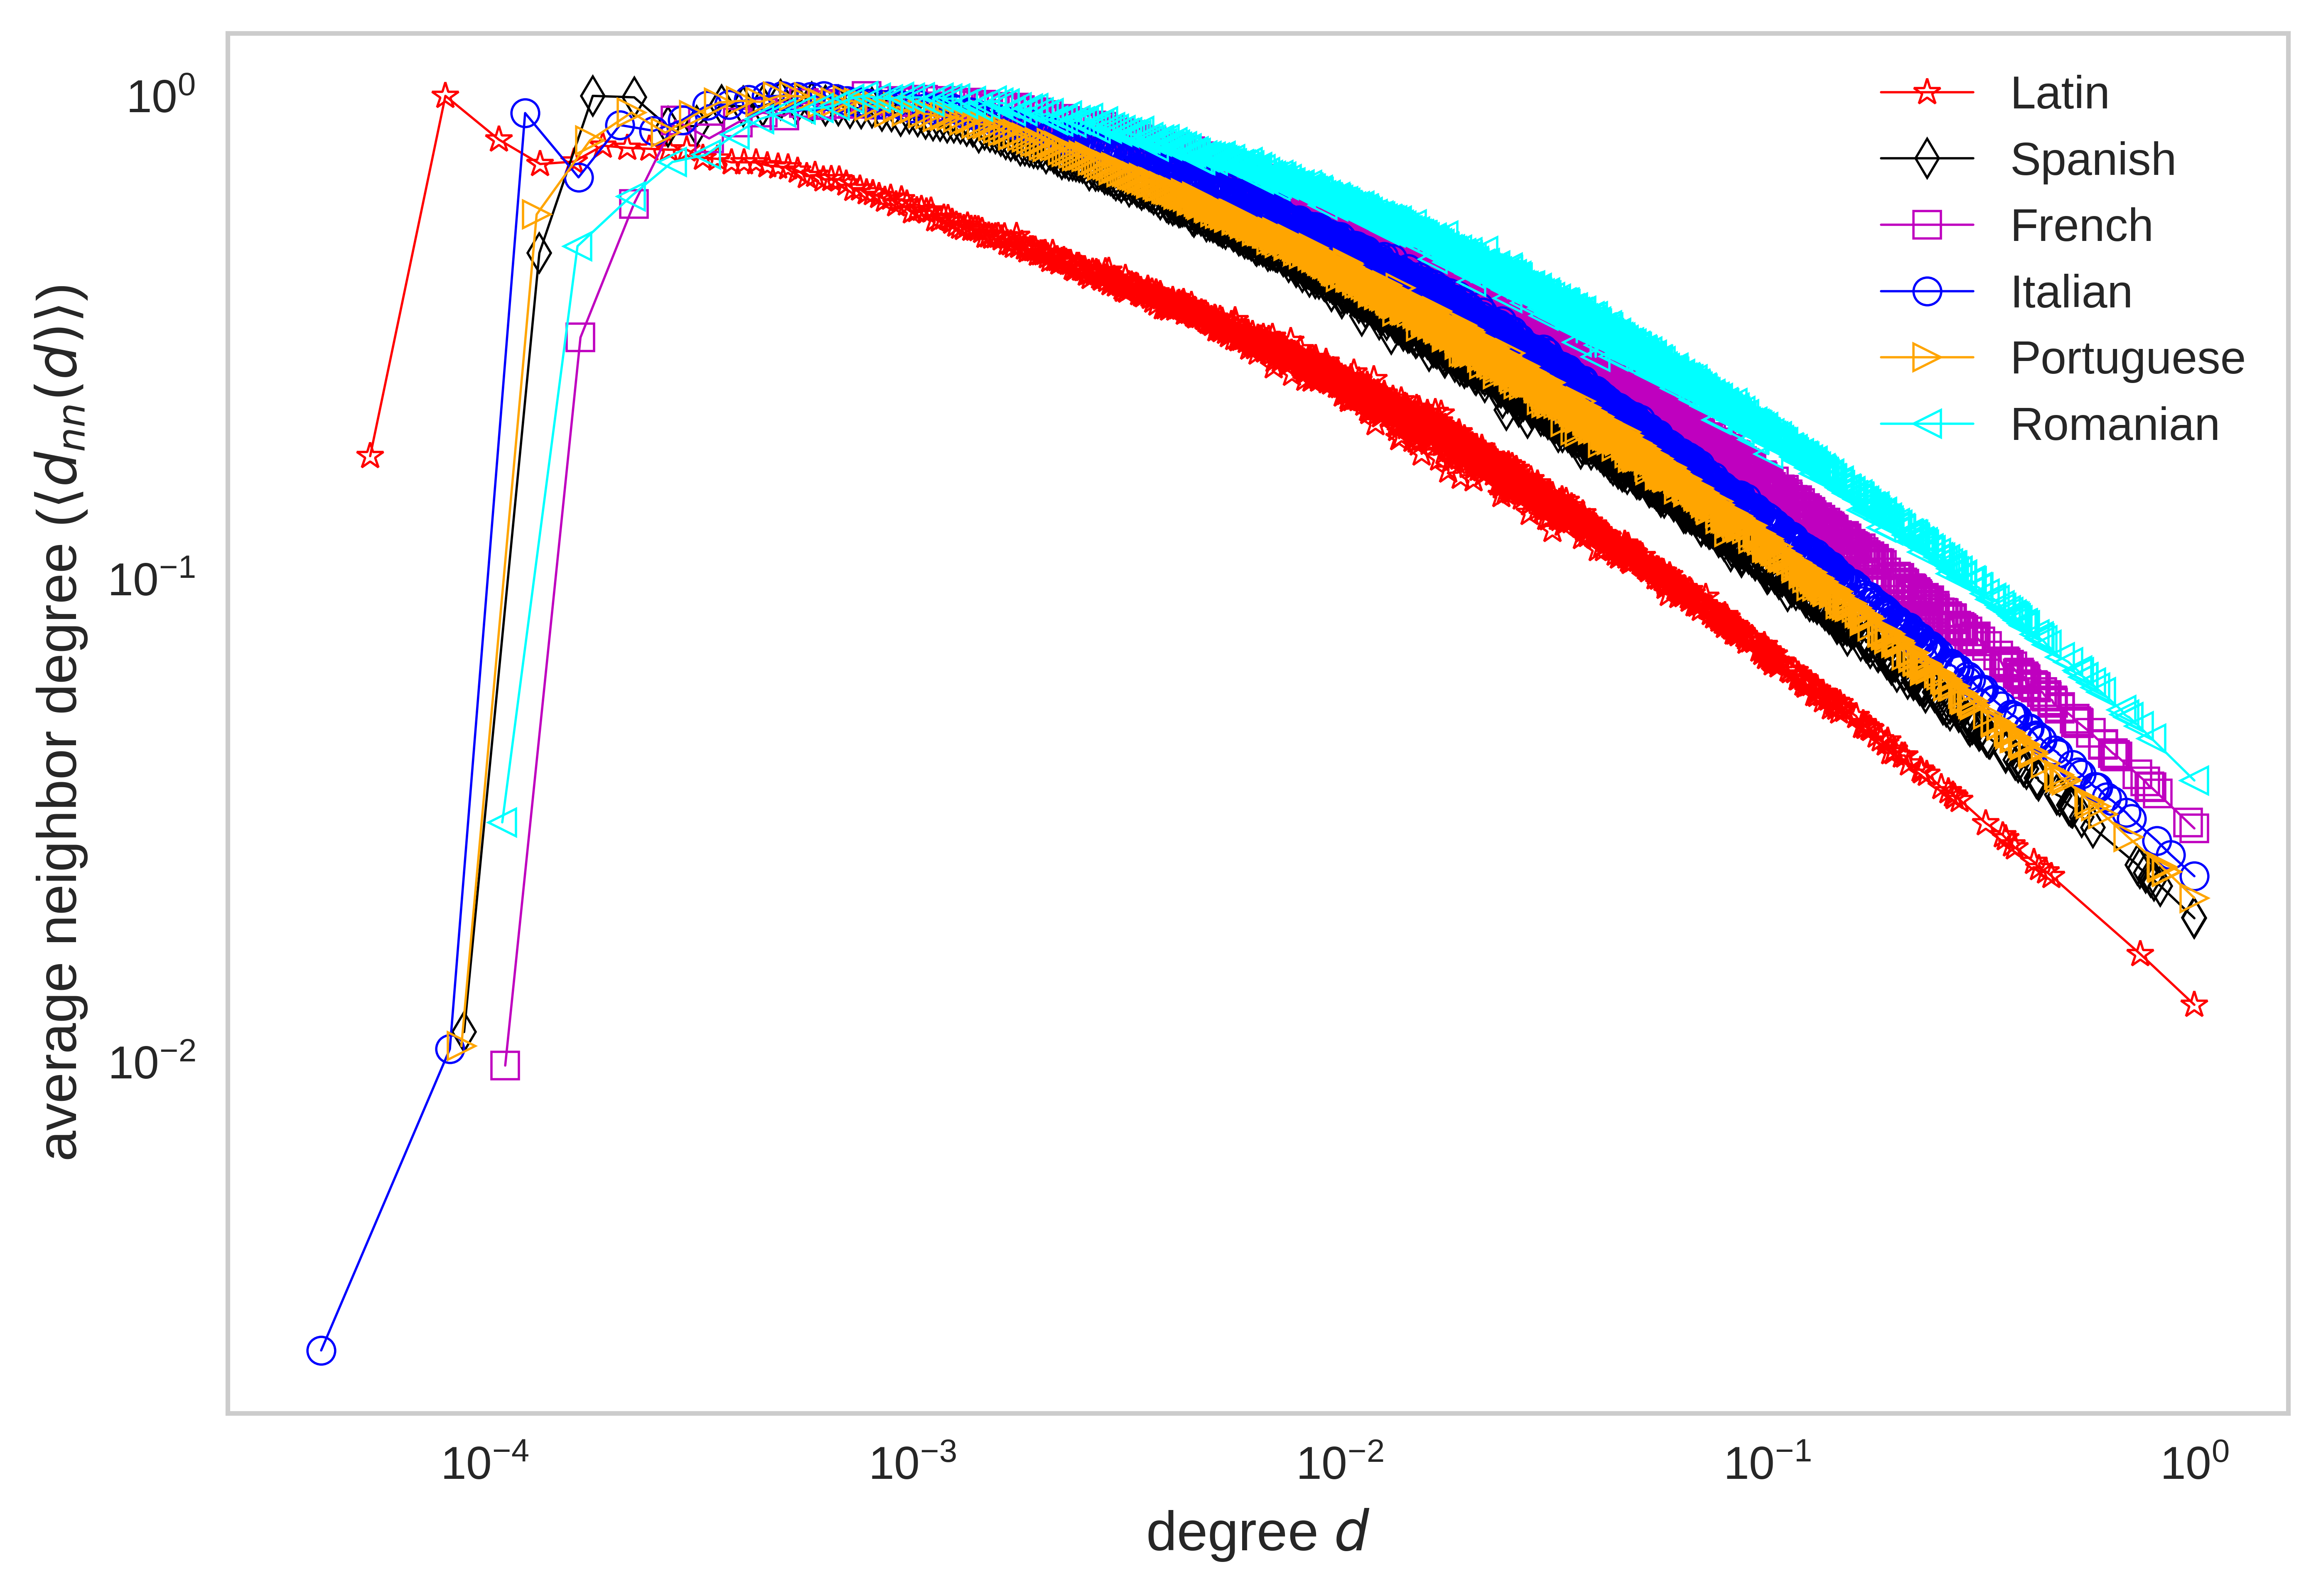

In [0]:
fig, ax = plt.subplots(dpi=800)

for language in language_names:
    degree=degree_connectivity[language]
    
    x=list(degree.keys())
    y=list(degree.values())
    x=[xx/float(max(x)) for xx in x]
    y=[yy/float(max(y)) for yy in y]
    x,y = zip(*sorted(zip(x,y)))
    ax.loglog(x,y, colors[language][0],marker=colors[language][1],markersize=6,fillstyle='none',markeredgewidth=0.5,clip_on=True,linewidth=0.5,label=language)

plt.grid(False)
plt.legend(loc='best')
plt.ylabel(r'average neighbor degree ($\langle d_{nn}(d) \rangle$)',fontsize=12)
plt.xlabel(r'degree $d$',fontsize=12)
plt.rcParams.update({'font.size': 10})
plt.savefig('degree_connectivity.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [0]:
!pip install powerlaw

  Running setup.py bdist_wheel for powerlaw ... - done
  Stored in directory: /root/.cache/pip/wheels/e0/27/02/08d0e2865072bfd8d7c655e290521e3feca3fc22f1ac460601
Successfully built powerlaw


In [0]:
import powerlaw
alpha={}
fig, ax = plt.subplots(dpi=800)

for language in language_names:
    degree=degree_sequence[language]
    
    x=[xx/float(max(range(1,len(degree)+1))) for xx in range(1,len(degree)+1)]
    y=[yy/float(max(degree)) for yy in degree]
    
    fit = powerlaw.Fit(y,xmin=10**(-3))
    alpha[language]=fit.alpha
    
    ax.loglog(x,y, colors[language][0],marker=colors[language][1],markersize=6,fillstyle='none',markeredgewidth=0.5,clip_on=True,linewidth=0.5,label=language)

plt.grid(False)
plt.legend(loc='best')
plt.ylabel(r'degree for rank $r$ ($P(r)$)',fontsize=12)
plt.xlabel(r'rank $r$',fontsize=12)
plt.rcParams.update({'font.size': 10})
plt.savefig('degree_sequence.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [0]:
alpha

{'French': 1.6977690700431904,
 'Italian': 1.8464065579279678,
 'Latin': 1.9551307766451356,
 'Portuguese': 1.8415560192421685,
 'Romanian': 1.6705386436217766,
 'Spanish': 1.841410354639166}

In [0]:
sorted(alpha.items(), key=operator.itemgetter(1),reverse=True)

[('Latin', 1.9551307766451356),
 ('Italian', 1.8464065579279678),
 ('Portuguese', 1.8415560192421685),
 ('Spanish', 1.841410354639166),
 ('French', 1.6977690700431904),
 ('Romanian', 1.6705386436217766)]

In [0]:
k_decomposition_size={}
for language in language_names:
    print(language)
    G=graphs[language]
    nkit_G=nkit.nxadapter.nx2nk(G)
    nkit_G.removeSelfLoops()
    coreDec = nkit.centrality.CoreDecomposition(nkit_G)
    coreDec.run()
    
    k_decomposition_size[language]=coreDec.getPartition().subsetSizeMap()

Latin
Spanish
French
Italian
Portuguese
Romanian


In [0]:
fig, ax = plt.subplots(dpi=800)
max_values={}

for language in language_names:
    X=list(k_decomposition_size[language].keys())
    X=[x/float(max(X)) for x in X]
    Y=list(k_decomposition_size[language].values())
    Y=[y/float(len(graphs[language])) for y in Y]
    max_values[language]=Y.index(max(Y[:-1]))
    ax.semilogx(X,Y, colors[language][0],marker=colors[language][1],markersize=6,fillstyle='none',markeredgewidth=0.5,clip_on=True,linewidth=0.5,label=language)

plt.grid(False)
plt.legend(loc='best')
plt.ylabel(r'size of $k-shell \ \frac{|S_k|}{|G|}$',fontsize=15)
plt.xlabel(r'shell index $\frac{k}{k_{max}}$ ($\log$ scale)',fontsize=15)
plt.rcParams.update({'font.size': 10})
plt.savefig('k_shell_zoom.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [0]:
max_values

{'French': 21,
 'Italian': 22,
 'Latin': 14,
 'Portuguese': 18,
 'Romanian': 17,
 'Spanish': 16}

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


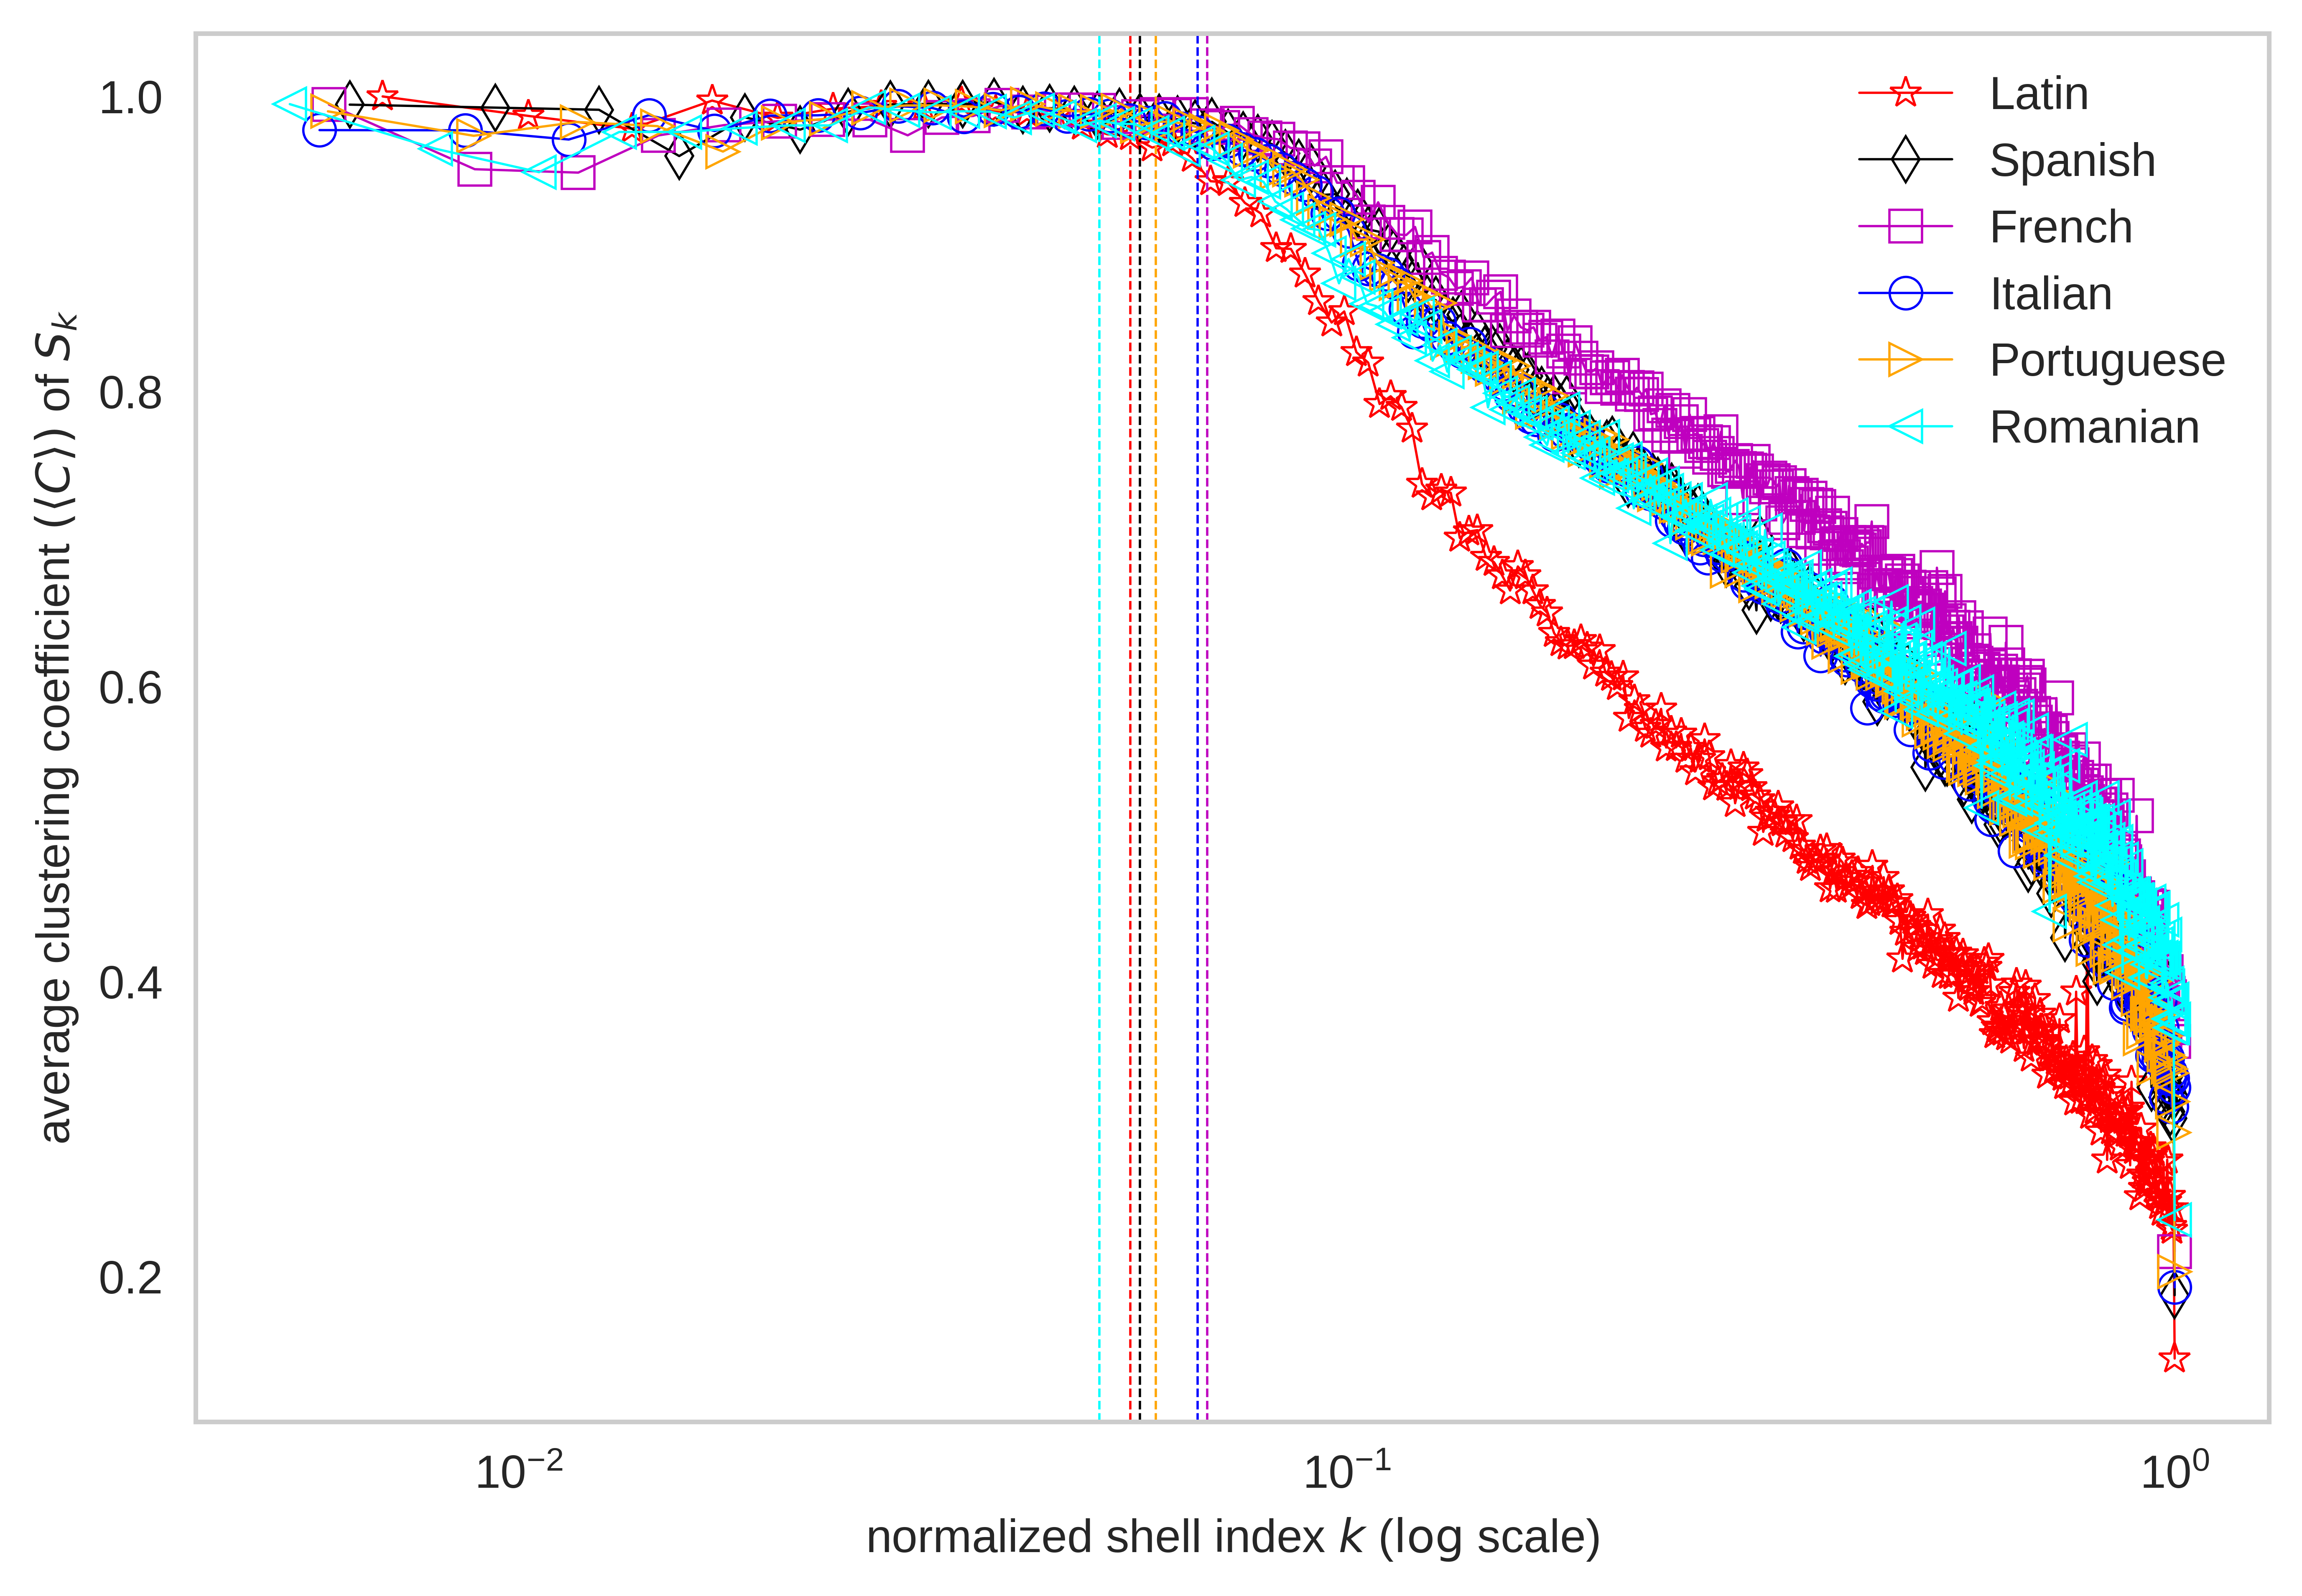

In [0]:
fig, ax = plt.subplots(dpi=800)

for language in language_names:
    X=[int(x) for x in shell_clustering[language][0]]
    Y=shell_clustering[language][1]
    index = 0
    dict = {}
    for i in X:
        if not (i in dict):
            dict[i] = []
        else:
            dict[i].append(Y[index])
        index += 1
    X=list(dict.keys())
    Y=[np.mean(dict[key]) for key in dict.keys()]
    
    X,Y = zip(*sorted(zip(X,Y)))
    
    X=[x/float(max(X)) for x in X]
    
    plt.axvline(x=X[max_values[language]], color=colors[language][0], linestyle='--',linewidth=0.5)
    ax.semilogx(X,Y, colors[language][0],marker=colors[language][1],markersize=7,fillstyle='none',markeredgewidth=0.5,clip_on=True,linewidth=0.5,label=language)

plt.grid(False)
plt.legend(loc='best')
plt.ylabel(r'average clustering coefficient $(\langle C \rangle)$ of $S_k$',fontsize=10)
plt.xlabel('normalized shell index $k$ ($\log$ scale)',fontsize=10)
plt.rcParams.update({'font.size': 10})
plt.savefig('core_clustering.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [0]:
components_core={}
for language in language_names:
    print(language)
    components_language={}
    G=graphs[language]
    core_numbers=nx.core_number(G)
    for core in set(list(core_numbers.values())):
        shell_nodes=list({k: v for k, v in core_numbers.items() if v==core}.keys())
        components_language[core]=nx.number_connected_components(G.subgraph(shell_nodes))/float(len(G))
    components_core[language]=components_language

Latin
Spanish
French
Italian
Portuguese
Romanian


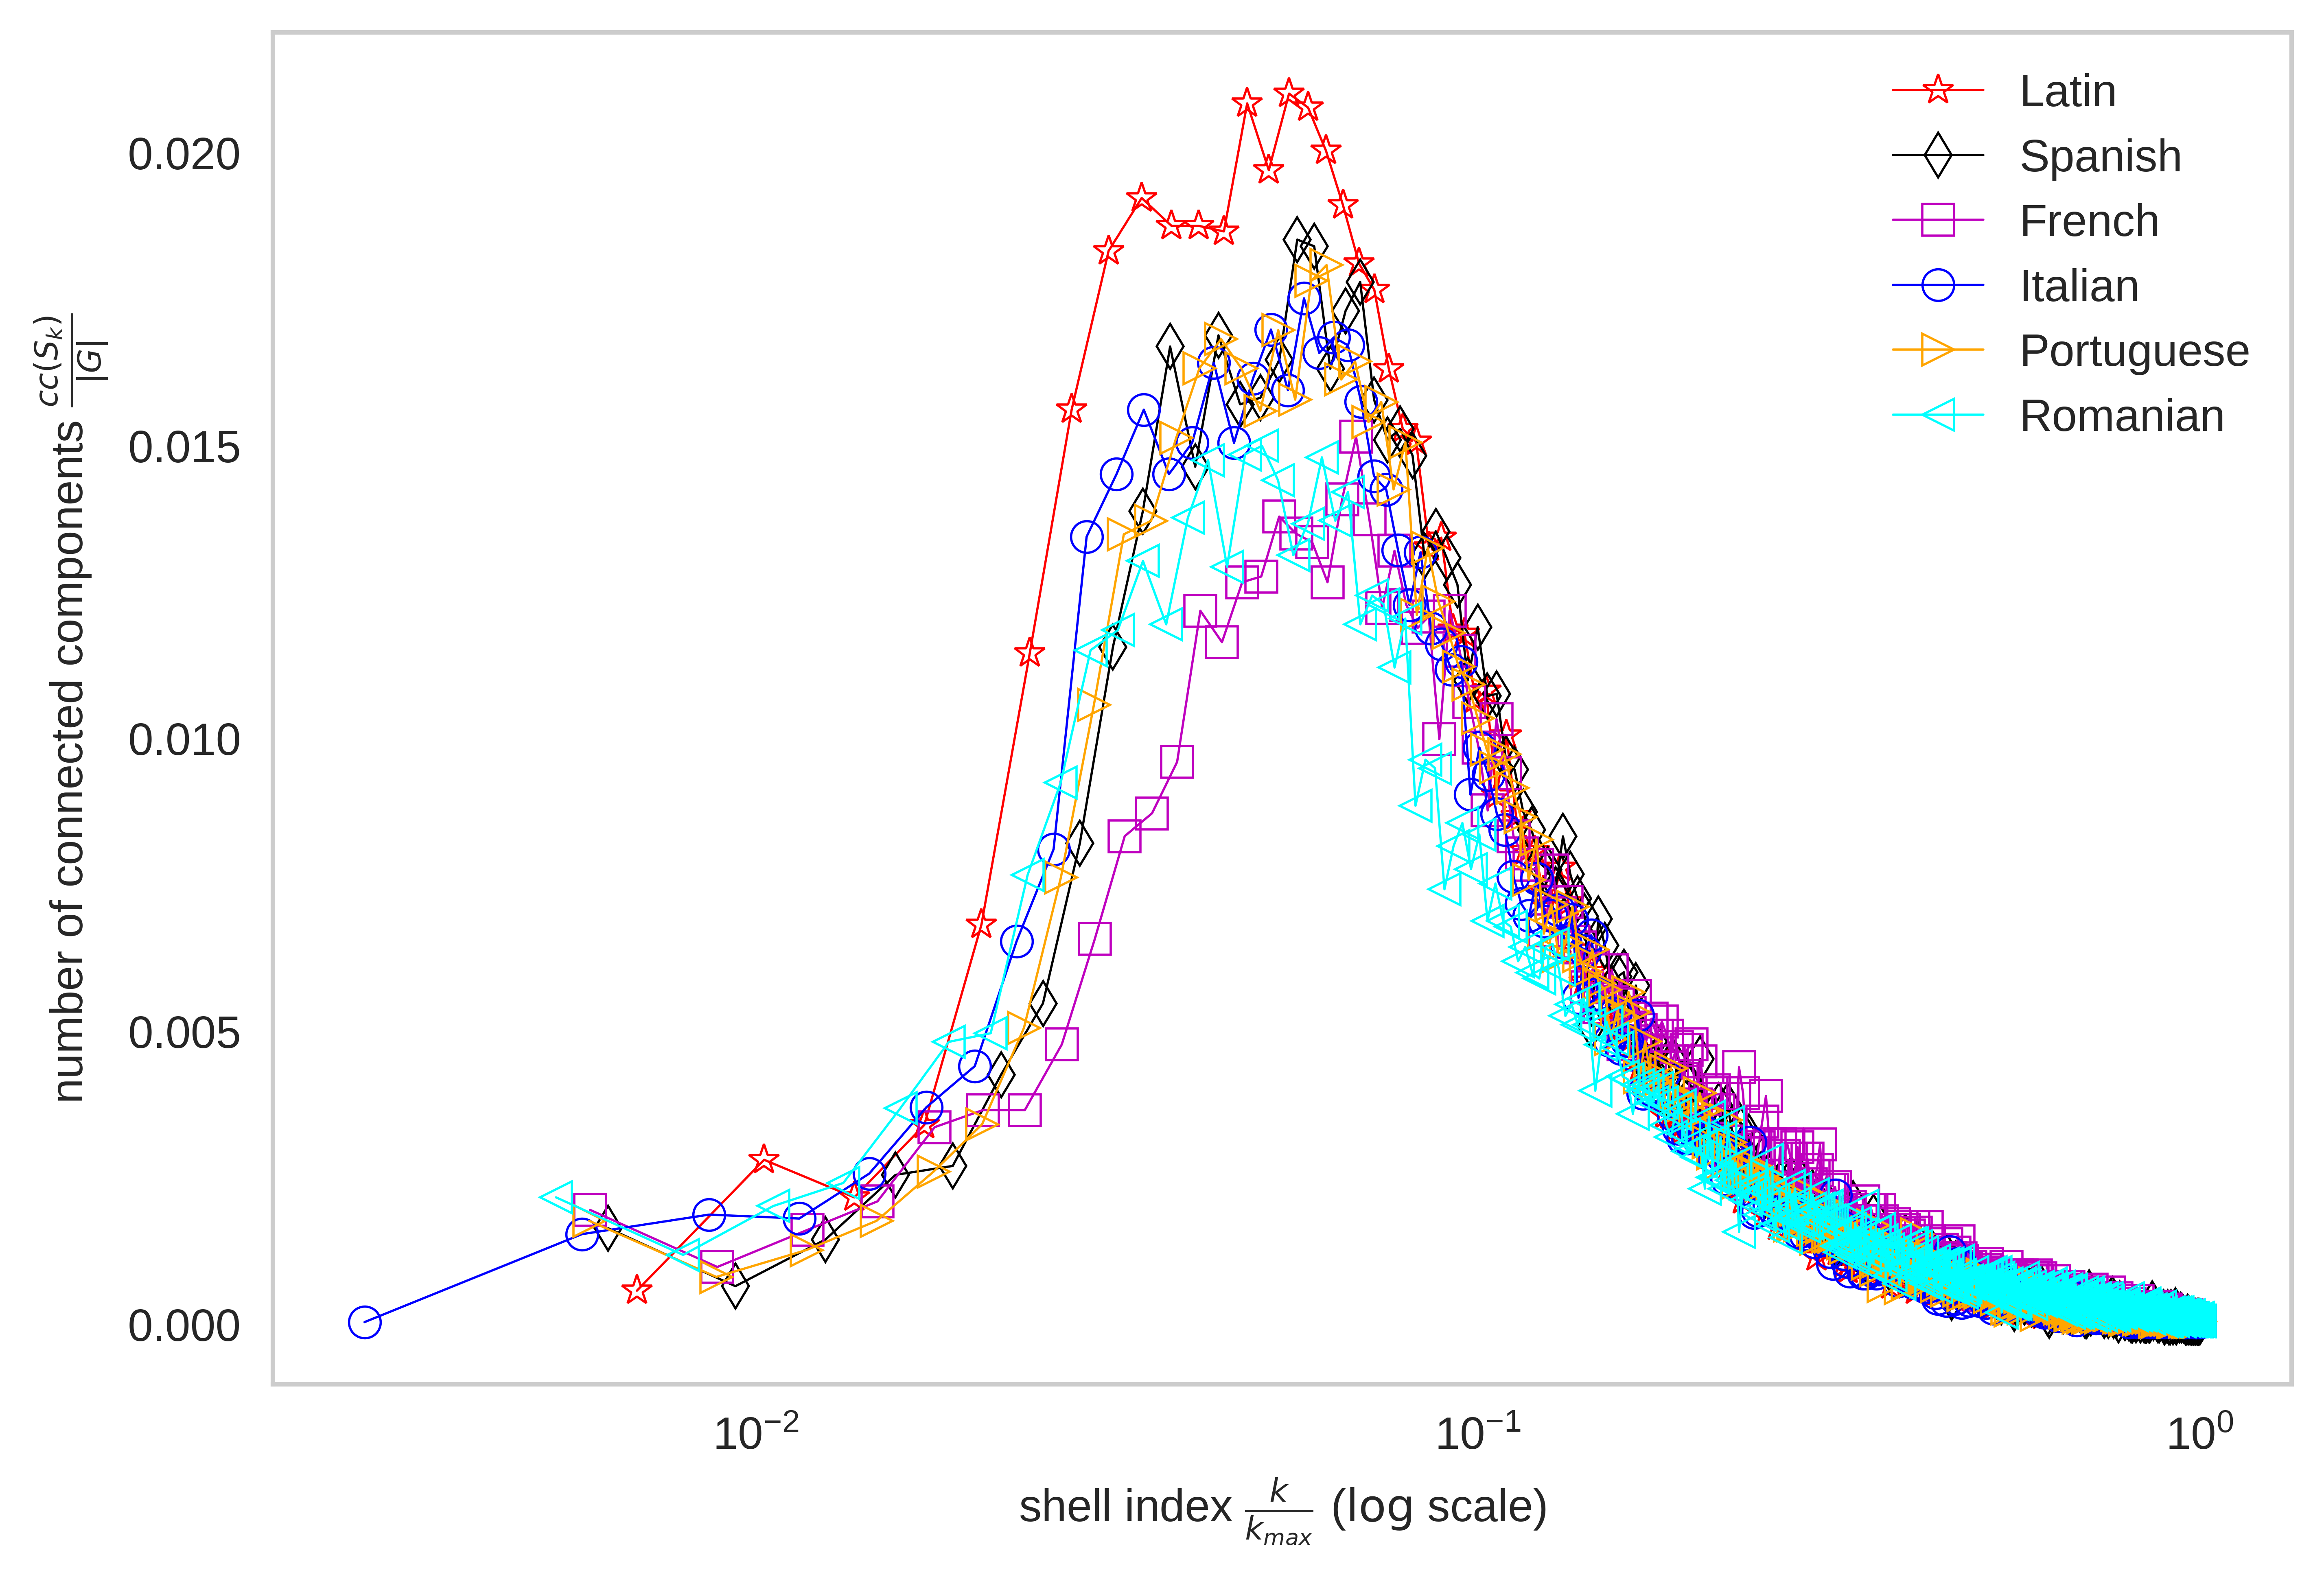

In [0]:
fig, ax = plt.subplots(dpi=800)
for language in language_names:

    x=list(components_core[language].keys())
    y=list(components_core[language].values())

    x=[xx/float(max(x)) for xx in x]
    #y=[yy/float(max(list(components_core['Latin'].values()))) for yy in y]

    #plt.axvline(x=X[max_values[language]], color=colors[language][0], linestyle='--',linewidth=0.5)
    ax.semilogx(x,y, colors[language][0],marker=colors[language][1],markersize=7,fillstyle='none',markeredgewidth=0.5,clip_on=True,linewidth=0.5,label=language)

plt.legend(loc='best')

ax.grid(False)
plt.ylabel(r'number of connected components $\frac{cc(S_k)}{|G|}$',fontsize=10)
plt.xlabel(r'shell index $\frac{k}{k_{max}}$ ($\log$ scale)',fontsize=10)
plt.rcParams.update({'font.size': 15})
plt.savefig('core_components.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()